<a href="https://colab.research.google.com/github/antog16/DataNMore/blob/main/8_logistics_regression_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importación de Librerías

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns

In [ ]:
columns = ['Sepal Length', 'Sepal Width', 'Petal Length',  'Petal Width', "C"]
iris = pd.read_fwf('iris.data', names = columns, delimiter = ',' )
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,C
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.dtypes

Sepal Length    float64
Sepal Width     float64
Petal Length    float64
Petal Width     float64
C                object
dtype: object

In [ ]:
iris.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
C               0
dtype: int64

In [ ]:
print(iris['C'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: C, dtype: int64


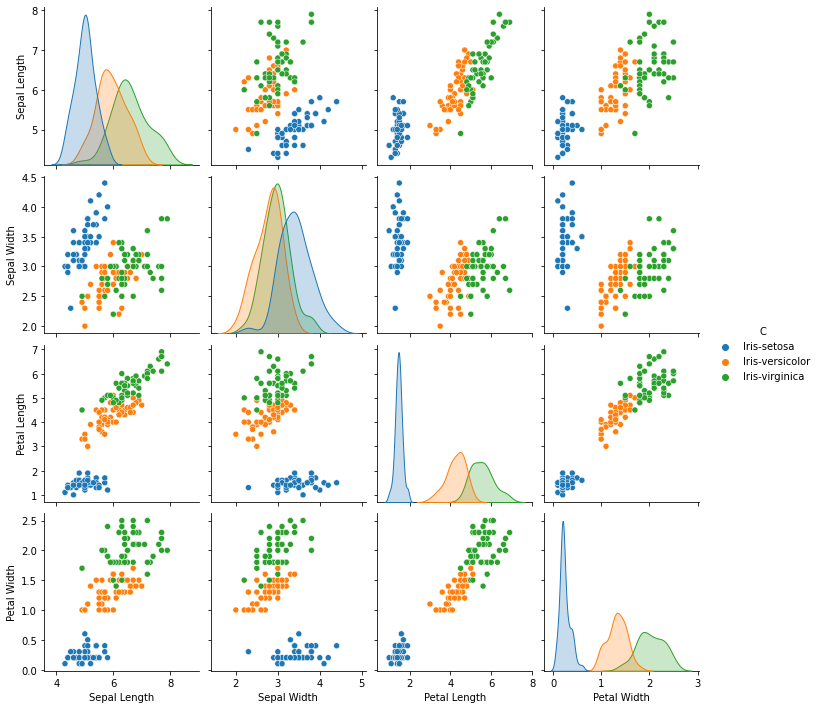

In [ ]:
sns.pairplot(iris, hue='C')

In [ ]:
iris.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.871754,-0.420516,1.000000,0.962757
Petal Width,0.817954,-0.356544,0.962757,1.000000


In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.drop('C', axis=1), iris.C, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


In [ ]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=500, tol=0.01)

In [ ]:
# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [ ]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.9777777777777777

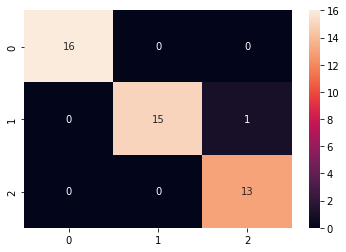

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True)